# Discriminant Analysis

## Module Import

In [11]:
# Data manipulation
import pandas as pd

# Math
import numpy as np 

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve

## Data Preparation

In [12]:
# Data import
data = pd.read_excel('training_data_capped.xlsx')

# Feature and output definition
X = data.iloc[:, :5]
y = data.iloc[:, 5]

# Split data set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                    )

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Fitting

In [13]:
modelLDA = LinearDiscriminantAnalysis()
modelQDA = QuadraticDiscriminantAnalysis()

modelLDA.fit(X_train_scaled, y_train)
modelQDA.fit(X_train_scaled, y_train)

,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


## Prediction

In [14]:
# Predictions
y_pred_LDA = modelLDA.predict(X_test_scaled)
y_pred_QDA = modelQDA.predict(X_test_scaled)

## Model evaluation

Classification Report:
LDA:                   precision    recall  f1-score   support

high_bike_demand       0.56      0.38      0.45        58
 low_bike_demand       0.87      0.94      0.90       262

        accuracy                           0.83       320
       macro avg       0.72      0.66      0.68       320
    weighted avg       0.82      0.83      0.82       320

QDA:                   precision    recall  f1-score   support

high_bike_demand       0.59      0.41      0.48        58
 low_bike_demand       0.88      0.94      0.91       262

        accuracy                           0.84       320
       macro avg       0.73      0.67      0.70       320
    weighted avg       0.83      0.84      0.83       320

Model Accuracy:
LDA: 0.8344
QDA: 0.8406

AUC Score:
LDA: 0.8388
QDA: 0.8345


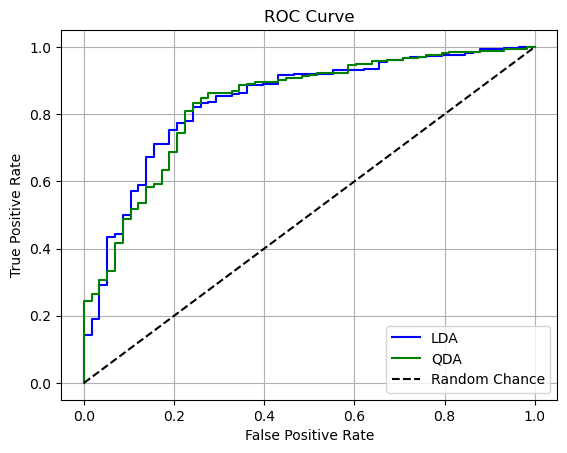

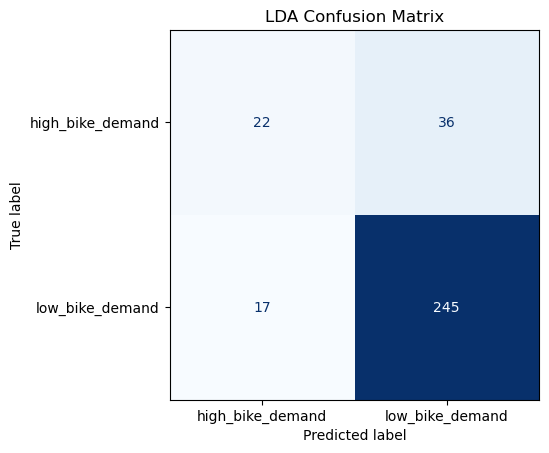

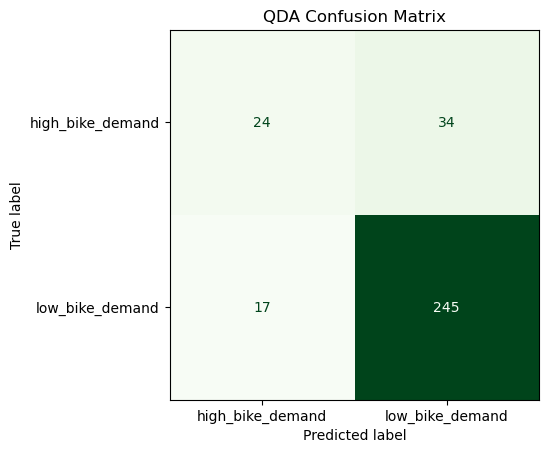

In [15]:
# Classification Report
print('Classification Report:')
print(f'LDA: {classification_report(y_test, y_pred_LDA)}')
print(f'QDA: {classification_report(y_test, y_pred_QDA)}')

# Model Accuracy
print('Model Accuracy:')
print(f'LDA: {accuracy_score(y_test, y_pred_LDA):.4f}')
print(f'QDA: {accuracy_score(y_test, y_pred_QDA):.4f}')

# ROC & AUC
print('\nAUC Score:')
prob_LDA = modelLDA.predict_proba(X_test_scaled)[:, 1]
prob_QDA = modelQDA.predict_proba(X_test_scaled)[:, 1]
print(f'LDA: {roc_auc_score(y_test, prob_LDA):.4f}')
print(f'QDA: {roc_auc_score(y_test, prob_QDA):.4f}')
pos_label = modelLDA.classes_[1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, prob_LDA, pos_label=pos_label)
fpr_qda, tpr_qda, _ = roc_curve(y_test, prob_QDA, pos_label=pos_label)

# ROC Viz
plt.plot(fpr_lda, tpr_lda, label='LDA', color='blue')
plt.plot(fpr_qda, tpr_qda, label='QDA', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_LDA, 
    cmap='Blues', 
    colorbar=False
)
plt.title('LDA Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred_QDA, 
    cmap='Greens', 
    colorbar=False
)
plt.title('QDA Confusion Matrix')
plt.show()